In [165]:
###################################################
## Arthor : Ryan Chui, Nene, Mayuresh
## Term Project: DSCI 644: Software Engineering for Data Science 

import nltk
nltk.download('stopwords')
import nltk.corpus
import pandas as pd
import string
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

data_df = pd.read_csv('Duplicate Bug Report/Eclipse/EP_dup.csv')
data_df.head()
print (list(data_df))

data_df['Description1']=data_df['Description1'].fillna('').apply(str)
data_df['Description2']=data_df['Description2'].fillna('').apply(str)
data_df['Title1']=data_df['Title1'].fillna('').apply(str)
data_df['Title2']=data_df['Title2'].fillna('').apply(str)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ryanchui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Issue_id', 'Duplicated_issue', 'Title1', 'Description1', 'Title2', 'Description2', 'Label']


In [166]:
nodup_df = pd.read_csv('Duplicate Bug Report/Eclipse/EP_nondup.csv',encoding='cp1252')
nodup_df.head()
print (list(nodup_df))

nodup_df['Description1']=nodup_df['Description1'].fillna('').apply(str)
nodup_df['Description2']=nodup_df['Description2'].fillna('').apply(str)
nodup_df['Title1']=nodup_df['Title1'].fillna('').apply(str)
nodup_df['Title2']=nodup_df['Title2'].fillna('').apply(str)

nodup_df['Description1'].head(10)

['Issue_id', 'Duplicated_issue', 'Title1', 'Description1', 'Title2', 'Description2', 'Label']


0    setup a project that contains a .gif resource ...
1    opening repository resource  open the default ...
2    kmpm \tthis pr about the deletion indicator in...
3    become synchronized with some project in a rep...
4    for gettingsetting the managed state of a reso...
5    iresource.setlocal has problems. this method w...
6    the platform is able to notify people that a r...
7    with the current vcm api a repository adapter ...
8    the implementation has to be changed because a...
9    repository creationdeletion  team stream creat...
Name: Description1, dtype: object

In [167]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
# stop_words = stopwords.words('english')
# print(stop_words)

### Applying cleaning, tokenization, and Lemmatization method

In [168]:
def identify_tokens(row):
    review = row['Description1']
    tokens = nltk.word_tokenize(review)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

data_df['Description1_clean'] = data_df.apply(identify_tokens, axis=1)
nodup_df['Description1_clean'] = nodup_df.apply(identify_tokens, axis=1)

def identify_tokens(row):
    review = row['Description2']
    tokens = nltk.word_tokenize(review)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

data_df['Description2_clean'] = data_df.apply(identify_tokens, axis=1)
nodup_df['Description2_clean'] = nodup_df.apply(identify_tokens, axis=1)

In [169]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))                  

def remove_stops(row):
    my_list = row['Description1_clean']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

data_df['Description1_clean'] = data_df.apply(remove_stops, axis=1)
nodup_df['Description1_clean'] = nodup_df.apply(remove_stops, axis=1)

def remove_stops(row):
    my_list = row['Description2_clean']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

data_df['Description2_clean'] = data_df.apply(remove_stops, axis=1)
nodup_df['Description2_clean'] = nodup_df.apply(remove_stops, axis=1)

### Instantiate Stemmer to join the words back together

In [170]:
def rejoin_words(row):
    my_list = row['Description1_clean']
    
    # " ".join() to the function to join the lists of words back together.
    joined_words = ( " ".join(my_list))
    
    return joined_words

data_df['Description1_processed'] = data_df.apply(rejoin_words, axis=1)
nodup_df['Description1_processed'] = nodup_df.apply(rejoin_words, axis=1)

def rejoin_words(row):
    my_list = row['Description2_clean']
    
    # " ".join() to the function to join the lists of words back together.
    joined_words = ( " ".join(my_list))
    
    return joined_words

data_df['Description2_processed'] = data_df.apply(rejoin_words, axis=1)
nodup_df['Description2_processed'] = nodup_df.apply(rejoin_words, axis=1)

data_df.to_csv('EU_DUP_Processed.csv')
nodup_df.to_csv('EU_Nondup_Processed.csv')

In [183]:
x = data_df.loc[data_df['Label'] == 1, ['Description1_processed', 'Label']]
y = data_df.loc[data_df['Label'] == 1, ['Description2_processed', 'Label']]

## Relabeling for appending correctly..
x.columns = x.columns.str.replace('Description1_processed', 'Processed')
y.columns = y.columns.str.replace('Description2_processed', 'Processed')

dup_out = x.append(y, ignore_index=True)
dup_out

# out = x['Description1_processed'].append(y['Description2_processed'], ignore_index=True)
# out_2 = x['Label'].append(y['Label'], ignore_index=True)
# dup = pd.DataFrame({
#     'Processed' : out,
#     'Label' : out_2
# })

m = nodup_df.loc[nodup_df['Label'] == 0, ['Description1_processed', 'Label']]
n = nodup_df.loc[nodup_df['Label'] == 0, ['Description2_processed', 'Label']]

## Relabeling for appending correctly..
m.columns = x.columns.str.replace('Description1_processed', 'Processed')
n.columns = y.columns.str.replace('Description2_processed', 'Processed')

no_dup_out = m.append(n, ignore_index=True)
no_dup_out

# out = x['Description1_processed'].append(y['Description2_processed'], ignore_index=True)
# out_2 = x['Label'].append(y['Label'], ignore_index=True)
# non_dup = pd.DataFrame({
#     'Processed' : out,
#     'Label' : out_2
# })

final_out = dup_out.append(no_dup_out, ignore_index=True)
final_out.head(15)
# final_out.to_csv('Final_df.csv')

,Processed,Label
0,would helpful notion default repository connec...,1.0
1,would like able connect team stream directly a...,1.0
2,project references come three flavours project...,1.0
3,useruser install drop declipse user java persp...,1.0
4,browsing files repositories view try open file...,1.0
5,need new button repo connection dialog otherwi...,1.0
6,synchronized released successfully teamstream ...,1.0
7,unknownhostexception caught host name invalid ...,1.0
8,inspired mornings server problems add projects...,1.0
9,comparereplace base version file dirty tell th...,1.0


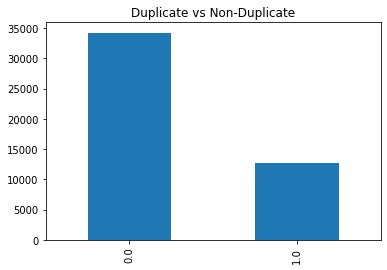

In [172]:
all_data = pd.concat([data_df, nodup_df])
## Simple EDA..
all_data['Label'].value_counts().plot(kind = 'bar', title = 'Duplicate vs Non-Duplicate')

In [173]:
all_data.shape

(46910, 11)

#### Above suggests that there are 12688 comments are classified as duplicates, and 34222 comments are classified as non-duplicates, and this is generally true when our group verified from 'EU_dup' and 'EU_Nondup' files. Class seem to be inbalance between two classes given by the data. Now,  Consider to drop na values and fix null values before taining. Otherwise, this will give an error..

In [174]:
final_out = final_out.dropna(axis=0)
final_out.shape
final_out.to_csv('final_out.csv')

In [175]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes 
from sklearn.naive_bayes import MultinomialNB

## TF-IDF Vectorizer
count_vec = CountVectorizer(binary = False, stop_words = 'english')
count_vec.fit(final_out['Processed'])
transformed = count_vec.transform(final_out['Processed'])

In [192]:
from sklearn.metrics import accuracy_score, confusion_matrix

y = final_out['Label']

X = final_out['Processed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('Accuracy: ' + str(accuracy_score(y_pred, y_test)))
print(classification_report(y_test, y_pred))

Accuracy %s0.7364269471290505
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85     20649
         1.0       0.64      0.02      0.05      7495

    accuracy                           0.74     28144
   macro avg       0.69      0.51      0.45     28144
weighted avg       0.71      0.74      0.63     28144



We achieved 74% accuracy.

In [193]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import numpy as np

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

train_size = int(len(final_out) * .8)
train_posts = final_out['Processed'][:train_size]
train_tags = final_out['Label'][:train_size]

test_posts = final_out['Processed'][train_size:]
test_tags = final_out['Label'][train_size:]

max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

batch_size = 32
epochs = 2

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

x_train shape: (75049, 1000)
x_test shape: (18763, 1000)
y_train shape: (75049, 2)
y_test shape: (18763, 2)
Train on 67544 samples, validate on 7505 samples
Epoch 1/2
67544/67544 [==============================] - 45s 661us/step - loss: 0.6254 - accuracy: 0.6593 - val_loss: 0.6073 - val_accuracy: 0.7515
Epoch 2/2
67544/67544 [==============================] - 46s 682us/step - loss: 0.5824 - accuracy: 0.6956 - val_loss: 0.5562 - val_accuracy: 0.7880


In [194]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)

print('Test score:', score[0])
print('Test accuracy:', score[1])

18763/18763 [==============================] - 2s 91us/step
Test score: 0.9677049510388628
Test accuracy: 0.6371049284934998


In [198]:
# Here's how to generate a prediction on individual examples
text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_posts.iloc[i][:50], "...")
    print('Actual label:' + str(test_tags.iloc[i]))
    print("Predicted label: " + str(predicted_label) + "\n")

resize name column variables view make smaller vie ...
Actual label:0.0
Predicted label: 1.0

using swt head got crash reproducible playing arou ...
Actual label:0.0
Predicted label: 1.0

appears rght left mode beng gnored n wpf text stll ...
Actual label:0.0
Predicted label: 0.0

launcher toolbar cutoff vsta wpf ...
Actual label:0.0
Predicted label: 0.0

id launch application window click button drop dro ...
Actual label:0.0
Predicted label: 1.0

breakpoint set external source file double click b ...
Actual label:0.0
Predicted label: 0.0

rename type contains anonmyous inner type breakpoi ...
Actual label:0.0
Predicted label: 0.0

usng utf example bug get cheese n console macos ru ...
Actual label:0.0
Predicted label: 0.0

start fresh workbench close intro switch resource  ...
Actual label:0.0
Predicted label: 0.0

run mixedmode launching example worksspace default ...
Actual label:0.0
Predicted label: 1.0



In [185]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [189]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

/Users/ryanchui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


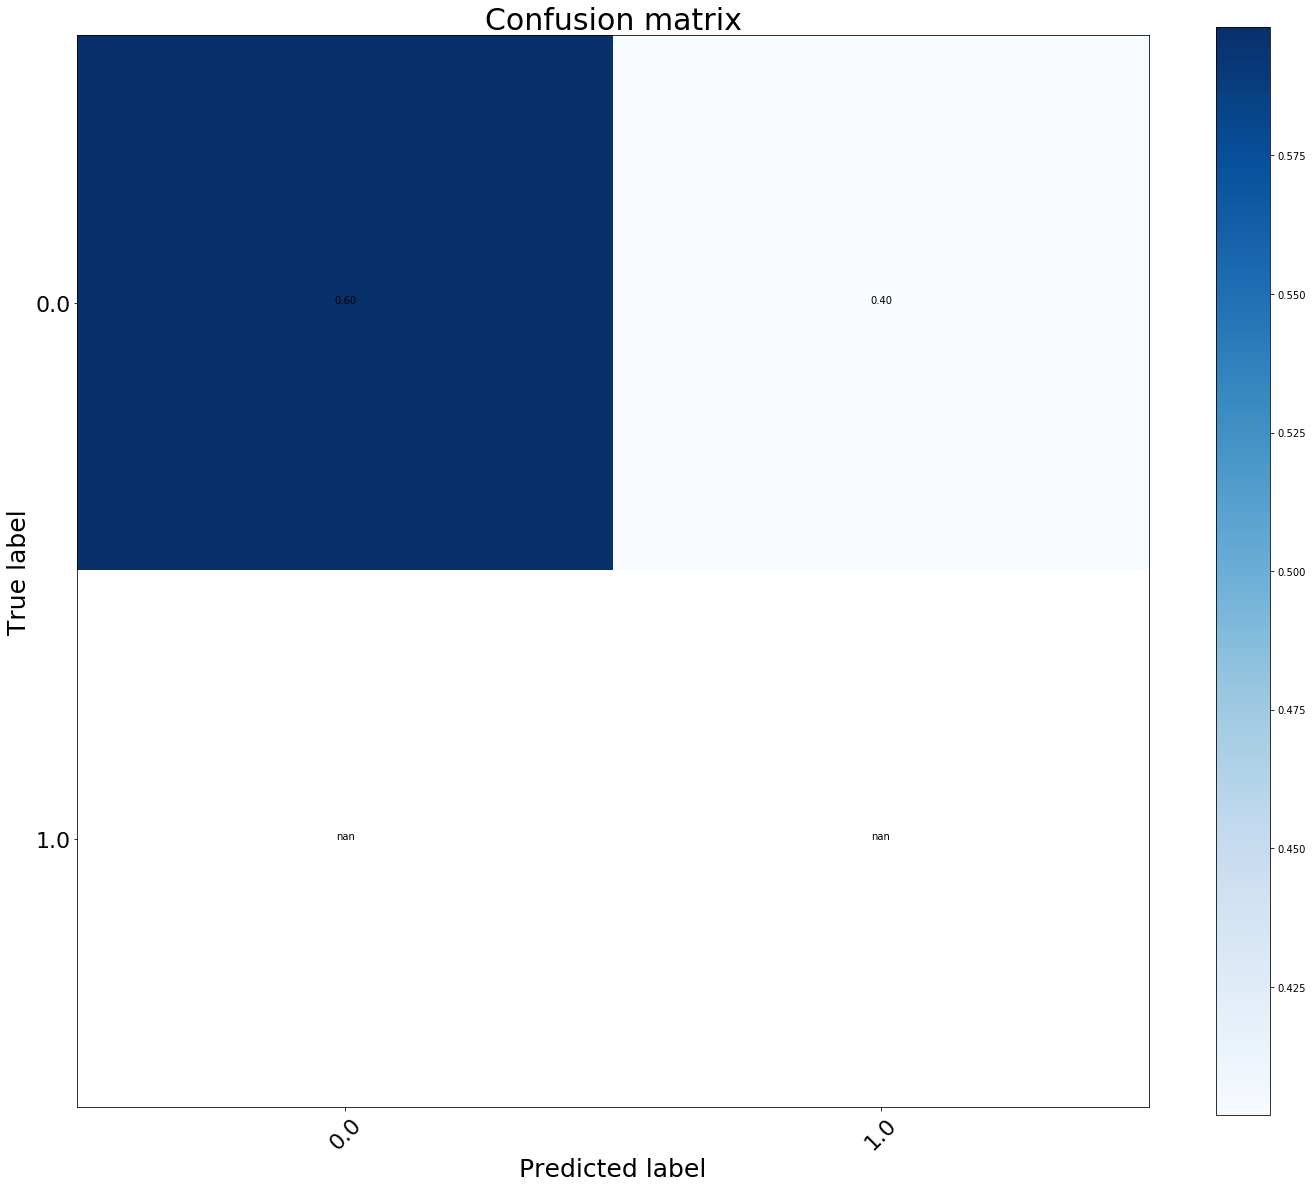

In [190]:
import itertools

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()